In [64]:
# import pandas library to read data from files and to create data frames
import pandas as pd
# import plot library
import matplotlib.pyplot as plt

from scipy import cluster

# import the PCA model.
from sklearn.decomposition import PCA

# Import the kmeans clustering model.
from sklearn.cluster import KMeans

# We mapped the data using force-directed graph
# Here is a link to an example: xxxxxxx
# I saved the x and y axis of each node to a csv file after the mapping
# Nodes here are keywords.

# read the x,y locations of the keywords from csv file to a dataframe
locs = pd.read_csv('data_files/afterMapping.csv',sep=';')
print(locs.columns)
print(locs.shape)

Index([u'id', u'x', u'y'], dtype='object')
(208, 3)


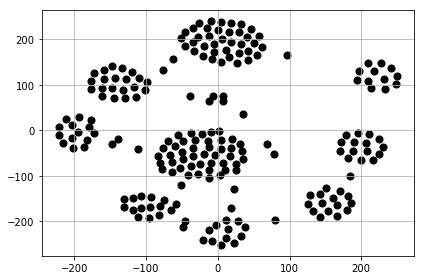

In [65]:
# Let's plot the keywords to see visually how they are clustered
plt.scatter(locs.iloc[:,1:2], locs.iloc[:,2:3], c='black', marker='o', s=50)
plt.grid()
plt.tight_layout()
plt.show()

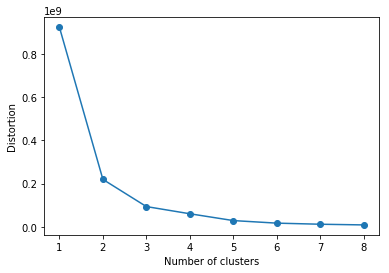

In [66]:
# Let's decide how many clusters are we going to create
# I will use "the elbow method"
# plot variance for each value for 'k' between 1,10 -- reason is that we visually guessed there is no more than 10 clusters

distortions = []
for i in range(1, 9):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=9,
                max_iter=300,
                random_state=0)
    km.fit(locs)
    distortions.append(km.inertia_)
plt.plot(range(1,9), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [67]:
# 6 seems to be a good choice, there the distortion starts to smooth down

km = KMeans(n_clusters=6,
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(locs.iloc[:,1:3])

# Get the cluster assignments.
labels = km.labels_

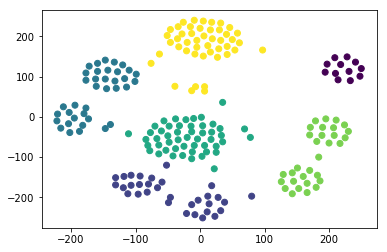

In [68]:
# Make a scatter plot of each game, shaded according to cluster assignment.
# labels comes from the kmeans model
plt.scatter(locs.iloc[:,1:2], locs.iloc[:,2:3], c=labels)

# Show the plot.
plt.show()